In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [17]:
zip_path = tf.keras.utils.get_file(origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip",
                                  fname = "jena_climate_2009_2016.csv.zip", extract=True)

csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 2s 0us/step


In [18]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [19]:
df.index = pd.to_datetime(df['Date Time'], format="%d.%m.%Y %H:%M:%S")
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


<Axes: xlabel='Date Time'>

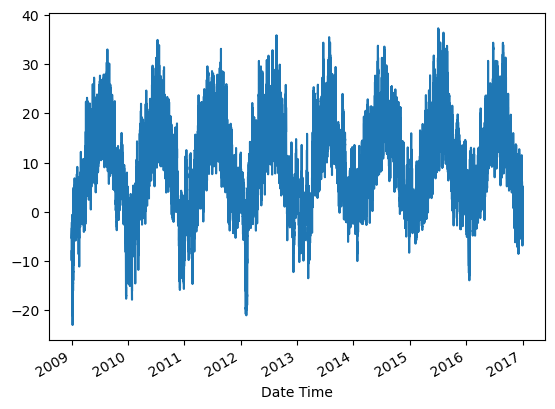

In [20]:
temp = df['T (degC)']
temp.plot()

In [29]:
temp

Date Time
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
                       ... 
2016-12-31 23:20:00   -4.05
2016-12-31 23:30:00   -3.35
2016-12-31 23:40:00   -3.16
2016-12-31 23:50:00   -4.23
2017-01-01 00:00:00   -4.82
Name: T (degC), Length: 420551, dtype: float64

In [27]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    
    return np.array(X), np.array(y)
        

In [28]:
WINDOW_SIZE=5
X,y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((420546, 5, 1), (420546,))

In [33]:
X_train, y_train = X[:360_000], y[:360_000]
X_val, y_val = X[360_000:390_000], y[360_000:390_000]
X_test, y_test = X[390_000:], y[390_000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((360000, 5, 1), (360000,), (30000, 5, 1), (30000,), (30546, 5, 1), (30546,))

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [38]:
model1 = Sequential()

model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
cp = ModelCheckpoint('model1/', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [40]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
11250/11250 [==============================] - ETA: 0s - loss: 6.1882 - root_mean_squared_error: 2.4876INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


11250/11250 [==============================] - 138s 12ms/step - loss: 6.1882 - root_mean_squared_error: 2.4876 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2058
Epoch 2/10
11246/11250 [============================>.] - ETA: 0s - loss: 0.0493 - root_mean_squared_error: 0.2219INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


11250/11250 [==============================] - 129s 11ms/step - loss: 0.0492 - root_mean_squared_error: 0.2219 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 3/10
11249/11250 [============================>.] - ETA: 0s - loss: 0.0453 - root_mean_squared_error: 0.2128INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


11250/11250 [==============================] - 125s 11ms/step - loss: 0.0453 - root_mean_squared_error: 0.2128 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1858
Epoch 4/10
11250/11250 [==============================] - 118s 10ms/step - loss: 0.0445 - root_mean_squared_error: 0.2109 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1896
Epoch 5/10
11245/11250 [============================>.] - ETA: 0s - loss: 0.0443 - root_mean_squared_error: 0.2104INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


11250/11250 [==============================] - 123s 11ms/step - loss: 0.0443 - root_mean_squared_error: 0.2104 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1850
Epoch 6/10
11250/11250 [==============================] - 115s 10ms/step - loss: 0.0441 - root_mean_squared_error: 0.2099 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1864
Epoch 7/10
11250/11250 [==============================] - 115s 10ms/step - loss: 0.0440 - root_mean_squared_error: 0.2097 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1887
Epoch 8/10
11248/11250 [============================>.] - ETA: 0s - loss: 0.0439 - root_mean_squared_error: 0.2094INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


11250/11250 [==============================] - 119s 11ms/step - loss: 0.0439 - root_mean_squared_error: 0.2094 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1848
Epoch 9/10
11250/11250 [==============================] - 117s 10ms/step - loss: 0.0438 - root_mean_squared_error: 0.2092 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1849
Epoch 10/10
11250/11250 [==============================] - 120s 11ms/step - loss: 0.0438 - root_mean_squared_error: 0.2092 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1919


In [41]:
from tensorflow.keras.models import load_model

In [42]:
model1 = load_model('model1/')

In [45]:
train_predictions = model1.predict(X_train).flatten()
trains_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
trains_results

11250/11250 [==============================] - 79s 7ms/step


,Train Predictions,Actuals
0,-8.256277,-8.05
1,-7.849976,-7.62
2,-7.336822,-7.62
3,-7.601405,-7.91
4,-7.934963,-8.43
...,...,...
359995,5.099476,5.67
359996,6.299706,5.79
359997,5.853151,5.99
359998,6.244428,5.72


In [46]:
import matplotlib.pyplot as plt

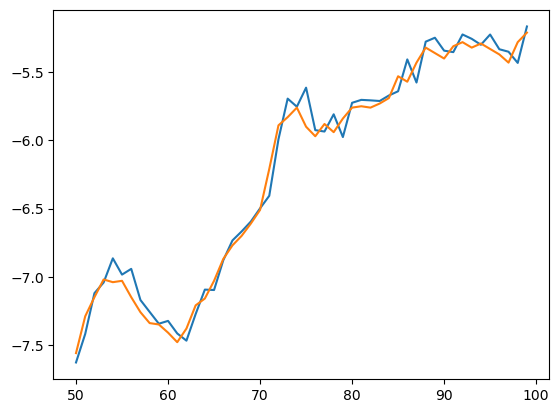

In [50]:
plt.plot(trains_results['Train Predictions'][50:100])
plt.plot(trains_results['Actuals'][50:100])

In [51]:
val_predictions = model1.predict(X_val).flatten()
val_results=pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

938/938 [==============================] - 8s 8ms/step


,Val Predictions,Actuals
0,6.100393,6.07
1,6.113592,6.71
2,7.093390,7.01
3,7.158956,7.44
4,7.769034,8.21
...,...,...
29995,18.286745,18.35
29996,18.247765,18.40
29997,18.376652,18.46
29998,18.448410,18.45


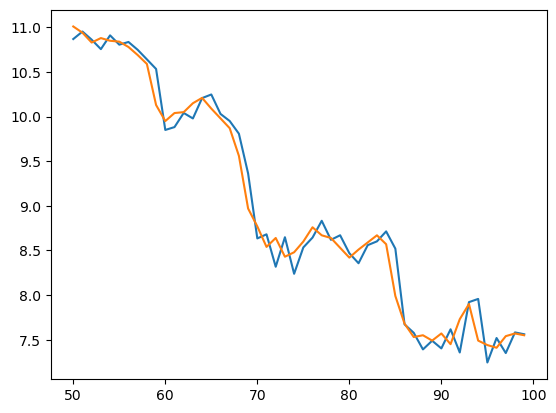

In [53]:
plt.plot(val_results['Val Predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [54]:
test_predictions = model1.predict(X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

955/955 [==============================] - 7s 7ms/step


,Test Predictions,Actuals
0,18.306770,18.27
1,18.218355,18.19
2,18.128845,18.16
3,18.118608,18.05
4,17.960495,18.00
...,...,...
30541,-3.990434,-4.05
30542,-3.971112,-3.35
30543,-2.957154,-3.16
30544,-3.160351,-4.23


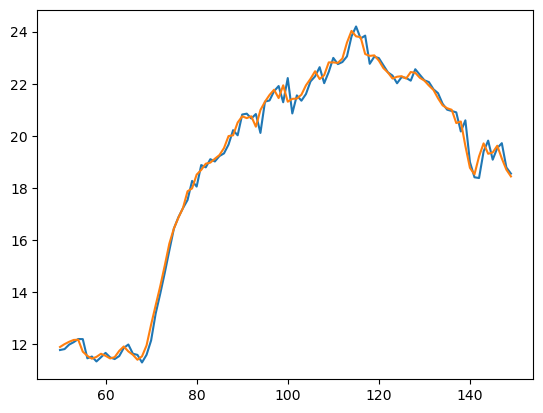

In [58]:
plt.plot(test_results['Test Predictions'][50:150])
plt.plot(test_results['Actuals'][50:150])